# №4. Компоненты моделей НС

In [4]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

In [5]:
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

## 1. Функции активации

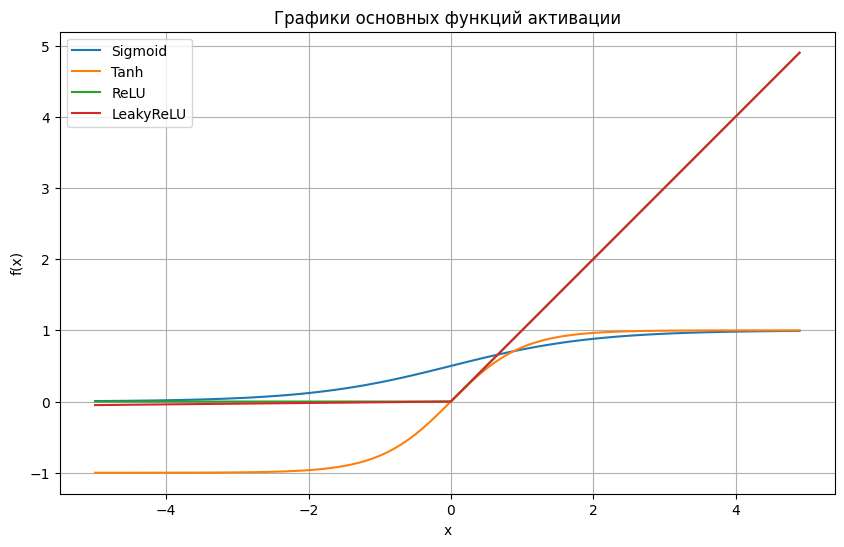

In [6]:
t = torch.arange(-5, 5, 0.1)

activations = {
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
    "ReLU": nn.ReLU(),
    "LeakyReLU": nn.LeakyReLU()
}

plt.figure(figsize=(10, 6))
for name, func in activations.items():
    plt.plot(t, func(t), label=name)

plt.title("Графики основных функций активации")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

**Функция активации** - это <u>нелинейные</u> переходы между слоями нейросети.

**_Основные функции активации в нейронных сетях_**

| Функция активации                   | Формула                                                   | График                                                          | Преимущества                                                                                                                                                                     | Недостатки                                                                                                                                                                | Область применения                                                                                                                                                 |
| :---------------------------------- | :-------------------------------------------------------- | :-------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | :----------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Sigmoid**<br>(Логистическая)      | $$f(x) = \frac{1}{1 + e^{-x}}$$                           | Плавная S-образная кривая от 0 до 1                             | • Простая для понимания.<br>• «Сжимает» выход в диапазон (0, 1), интерпретируемый как вероятность.                                                                               | • **Проблема затухающих градиентов**: на краях градиент близок к 0, что сильно замедляет обучение.<br>• Вычисления экспоненты дорогие.<br>• Вывод не нуле-центрированный. | Выходной слой для **бинарной классификации** (вероятность). Раньше использовалась повсеместно, сейчас в скрытых слоях применяется редко.                           |
| **Hyperbolic Tangent**<br>(Tanh)    | $$f(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$$          | Плавная S-образная кривая от -1 до 1                            | • **Нуле-центрированная** (среднее значение ~0), это ускоряет сходимость по сравнению с сигмоидой.<br>• Часто работает лучше сигмоиды в скрытых слоях.                           | • Все еще страдает от **проблемы затухающих градиентов** на краях.                                                                                                        | **Скрытые слои** различных архитектур. Предпочтительнее сигмоиды, так как центрирована вокруг нуля.                                                                |
| **Rectified Linear Unit**<br>(ReLU) | $$f(x) = \max(0, x)$$                                     | Ноль для x < 0, прямая линия y=x для x >= 0                     | • **Устойчива к затуханию градиента** (для положительных значений).<br>• Очень быстрая в вычислении.<br>• На практике сильно ускоряет сходимость.                                | • **"Умирающий ReLU"**: если нейрон всегда выдает отрицательный вход, он "умирает" (градиент становится 0) и больше не обучается.<br>• Вывод не нуле-центрированный.      | **Скрытые слои по умолчанию** для большинства архитектур (особенно в CNN и MLP). Самый популярный выбор.                                                           |
| **Leaky ReLU**<br>(LReLU)           | $$f(x) = \max(\alpha x, x)$$<br>где $\alpha \approx 0.01$ | Прямая с малым наклоном ($\alpha$) для x<0, прямая y=x для x>=0 | • **Решает проблему "умирающего ReLU"**: у отрицательных значений есть небольшой, но ненулевой градиент ($\alpha$).<br>• Сохраняет все преимущества ReLU (скорость, сходимость). | • На практике не всегда показывает значительное улучшение перед ReLU.<br>• Результаты могут зависеть от выбора параметра $\alpha$ (хотя часто он фиксирован).             | Альтернатива ReLU в **скрытых слоях**, особенно когда есть подозрение на "умирающие" нейроны. Основа для более продвинутых версий (PReLU, где $\alpha$ обучается). |


## 2. Функции потерь

***Основные функции потерь в машинном обучении***

| Задача ML                        | Функция потерь                       | Формула (LaTeX)                                                                   | Назначение                           | Особенности                                                                                 |
| :------------------------------- | :----------------------------------- | :-------------------------------------------------------------------------------- | :----------------------------------- | :------------------------------------------------------------------------------------------ |
| **Регрессия**                    | **MSE**<br>(Mean Squared Error)      | $$L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$                              | Прогнозирование непрерывных значений | • Сильно штрафует выбросы<br>• Дифференцируема<br>• Чувствительна к масштабу данных         |
| **Бинарная классификация**       | **Binary Cross-Entropy**             | $$L = -\frac{1}{n}\sum_{i=1}^{n}[y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]$$ | Классификация на 2 класса            | • Работает с вероятностями<br>• Чувствительна к дисбалансу классов<br>• Использует сигмоиду |
| **Многоклассовая классификация** | **Categorical Cross-Entropy**        | $$L = -\frac{1}{n}\sum_{i=1}^{n}\sum_{c=1}^{C}y_{i,c}\log(\hat{y}_{i,c})$$        | Классификация на C > 2 классов       | • One-hot encoding<br>• Использует softmax<br>• Стандарт для классификации                  |
| **Многоклассовая классификация** | **Sparse Categorical Cross-Entropy** | $$L = -\frac{1}{n}\sum_{i=1}^{n}\log(\hat{y}_{i,y_i})$$                           | Классификация на C > 2 классов       | • Целевые метки как целые числа<br>• Экономит память<br>• Не требует one-hot                |
| **Кластеризация**                | **K-Means Loss**                     | $$L = \sum_{i=1}^{n}\min_{\mu_j \in C} \|x_i - \mu_j\|^2$$                        | Кластеризация данных                 | • Минимизация внутрикластерного расстояния<br>• Не дифференцируема                          |
| **Ранжирование**                 | **Hinge Loss**                       | $$L = \frac{1}{n}\sum_{i=1}^{n}\max(0, 1 - y_i\hat{y}_i)$$                        | SVM, ранжирование                    | • Максимизирует зазор (margin)<br>• Устойчива к шуму<br>• Используется в SVM                |

<img src="data/my_images/loss_funcs.png" width=500>

In [ ]:
nn.L1Loss(), nn.MSELoss(), nn.CTCLoss()

## 3. Модели нейронной сети

In [ ]:
%%skip
class myNN(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__()
        ...
    
    def forward(self, *args):
        ...

In [9]:
nn.Sequential(), nn.ModuleList(), nn.ModuleDict()

(Sequential(), ModuleList(), ModuleDict())

<img src="data/my_images/nn_mnist_model.png" width=500>

In [11]:
# Модель с последовательными слоями
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

In [ ]:
# Добавление имени слоям для удобсвта отладки
model = nn.Sequential()
model.add_module('layer_1', nn.Linear(784, 128))
model.add_module('ReLU', nn.ReLU())
model.add_module('layer_2', nn.Linear(128, 10))

In [ ]:
# Написание собственной НС
class myNN(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.act = nn.ReLU()
        self.layer_2 = nn.Linear(128, output)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.act(x)
        out = self.layer_2(x)
        return out

In [ ]:
# Написание собсенной НC
class myNN(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        # простые модели не стоит усложнять
        self.model = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
        
    def forward(self, x):
        out = self.model(x)
        return out

<img src="data/my_images/nn_example_1.png" width=500>

In [17]:
class myNN(nn.Module):
    def __init__(self, input, output):
        super().__init__()
        self.layer_1 = nn.Linear(input, 128)
        self.act = nn.ReLU()
        self.layer_2 = nn.Linear(128, output)
        
    def forward(self, x, y):
        x = self.layer_1(x)
        x = self.act(x + y) # суммируем и передаем в ReLU
        out = self.layer_2(x)
        # возвращаем выход последнего и предпоследнего слоя
        return out, x

<img src="data/my_images/nn_example_2.png" width=500>

In [19]:
class myNN(nn.Module):
    def __init__(self, input, output, hidden_size=2048):
        super().__init__()
        layers = []
        for i in range(10):
            lin = nn.Linear(input, hidden_size)
            layers.append(lin)
            layers.append(nn.ReLU())
            input = hidden_size
            hidden_size //= 2
        last_lin = nn.Linear(input, output)
        layers.append(last_lin)
        self.model = nn.Sequential(*layers)
        
    def forward(self, x):
        out = self.model(x)
        return out

<img src="data/my_images/nn_example_3.png" width=700>

In [ ]:
class myLastModelTochnoOkey256GB1080pFullHD123456789qwerty(nn.Module):
    def __init__(self, input, output, hidden_size=2048, activation_func='relu'):
        super().__init__()
        # словарь для простой смены функции потерь
        self.activations = nn.ModuleDict({
            'lrelu':nn.LeakyReLU(),
            'relu':nn.ReLU()
        })
        # слои можно хранить в ModuleList
        self.layers = nn.ModuleList()
        for i in range(10):
            lin = nn.Linear(input, hidden_size)
            lin_name = f'layer_{i}'
            self.layers.add_module(lin_name, lin)
            # теперь можно давать названия слоям для удобства
            self.layers.add_module((f'act_{i}', self.activations[activation_func]))
            input = hidden_size
            hidden_size //= 2
        last_lin = nn.Linear(input, output)
        self.layers.add_module('layer_out', last_lin)
    
    def forward(self, x):
        outputs = []
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i % 2 == 0 and i % 4 != 0: # каждый второй через одного
                outputs.append(x)
        outputs.append(x) # выход последнего слоя
        return outputs